<a href="https://colab.research.google.com/github/ancestor9/Data-Analyst-with-Gemini-/blob/main/6%EC%9D%BC%EC%B0%A8/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src= 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTsGJLCnoRXMJENhWMl4D4pVh6mL97ctKrIKQ&s'>

<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRpIq8lm3whwYqce_q4n6gqZ9q1yzu5E5m2Kg&s'>

<img src ='https://www.researchgate.net/publication/266281138/figure/fig8/AS:669511418118149@1536635369450/Blurred-image-of-a-moving-car.ppm'>

## **주성분분석(PCA, Principal Component Analysis)**
- 고차원의 데이터를 저차원으로 축소하면서 데이터의 중요한 패턴을 유지하는 통계 기법입니다. PCA는 데이터의 분산을 최대화하는 축을 찾아 데이터를 새로운 좌표계로 변환합니다. 이를 통해 데이터의 차원을 줄이고, 시각화나 분석을 용이하게 합니다.
- **아래 그림의 의미(주성분의 선형식과 Loadings) : 수직선과 수평선의 경우**

<img src='https://wikidocs.net/images/page/34042/pca_new.jpg'>

In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
import pandas as pd

# 3개 변수로 구성된 데이터 생성
n_samples = 1000
n_features = 3
n_clusters = 3
X, y = make_blobs(n_samples=n_samples, centers=n_clusters, n_features=n_features, random_state=42, cluster_std=1.5)
X

array([[ -1.18010228,   8.8086694 ,   4.94008046],
       [  1.58242184,  -4.28937643,  -6.73545902],
       [ -1.66214603,   8.06237858,   6.13350719],
       ...,
       [  2.56129648,  -7.16297222,  -6.05049968],
       [-10.49310189,   6.85470881,  -0.45979218],
       [ -1.348647  ,   8.20707364,   2.61986169]])

In [5]:
y[:100]

array([0, 1, 0, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 1, 0, 0, 0, 2, 1, 1,
       0, 1, 2, 2, 2, 1, 0, 1, 1, 0, 1, 1, 2, 2, 1, 0, 0, 1, 0, 1, 2, 0,
       0, 2, 0, 1, 0, 2, 1, 0, 0, 2, 1, 0, 0, 2, 1, 2, 1, 2, 0, 0, 0, 2,
       2, 0, 2, 2, 2, 2, 1, 0, 1, 0, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 0,
       1, 1, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0])

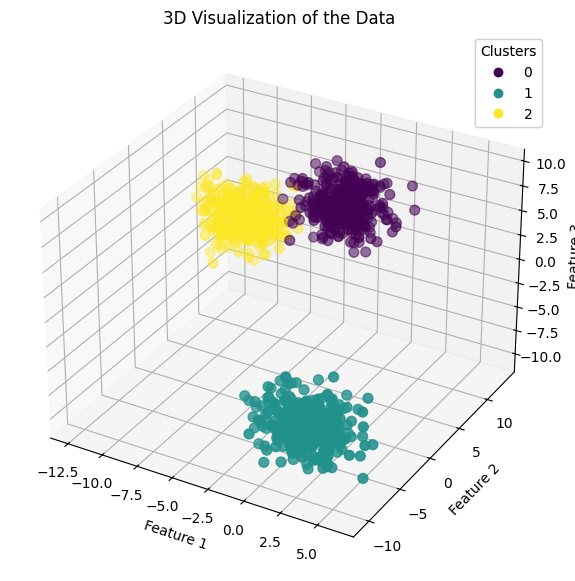

In [6]:
# 3차원 시각화
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis', s=50)
legend1 = ax.legend(*scatter.legend_elements(), title="Clusters")
ax.add_artist(legend1)
ax.set_title('3D Visualization of the Data')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

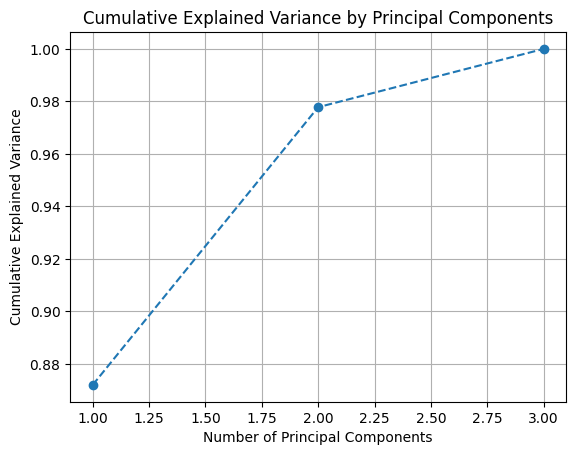

In [8]:
# 주성분분석(PCA) 적용
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# 주성분의 설명 분산 비율
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

# 주성분의 누적기여율을 보여주는 그래프
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


/tmp/ipython-input-9-2033723263.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(subset[:, 0], subset[:, 1], s=50, label=f'Cluster {cluster}', cmap='viridis')


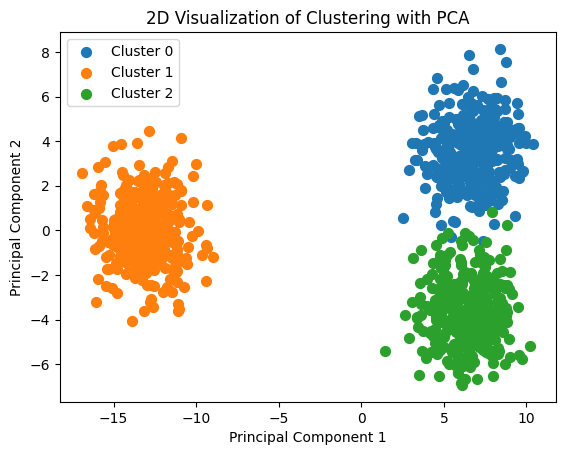

In [9]:
# 2차원 시각화 (첫 두 개의 주성분)
for cluster in range(n_clusters):
    subset = X_pca[y == cluster]
    plt.scatter(subset[:, 0], subset[:, 1], s=50, label=f'Cluster {cluster}', cmap='viridis')

plt.legend()
plt.title('2D Visualization of Clustering with PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

## **PCA의 목적**
- 차원 축소: 데이터의 중요한 정보를 유지하면서 차원을 줄여서 계산 효율성을 높입니다.
- 시각화: 고차원의 데이터를 2차원 또는 3차원으로 축소하여 시각적으로 분석할 수 있습니다.
- 노이즈 제거: 데이터의 분산이 적은 차원을 제거하여 노이즈를 줄입니다.
특징 추출: 데이터의 주요 특징을 추출하여 모델 성능을 향상시킬 수 있습니다.

### **[PythonDataScienceHandbook-principal-component-analysis](https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html)**